In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("./dataset/diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [28]:
cols = list(df.columns)
cols_len = len(cols)

features = df.filter(items=cols[:cols_len-1])
features
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
target = df.filter(items=["Outcome"])
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [30]:
# Padronização dos dados
scaler = StandardScaler()
features = scaler.fit_transform(features)
# Média 0 e Variância 0, ou seja, dados estao no centralizados no (0,0)
print(features.shape)

(768, 8)


In [31]:
U, S, Vt = np.linalg.svd(features)

V_first_two_PCs = Vt[:, 2]

explained_variance_ratio = S**2 / np.sum(S**2)

print(V_first_two_PCs)
print(explained_variance_ratio)


[-0.36000261  0.18389207 -0.53549442  0.05598649  0.32795306 -0.6341159
 -0.19211793  0.01129554]
[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [32]:
# Scores
projected_data = features @ Vt
print(projected_data[:,0].shape)
projected_data[:,0]

(768,)


array([ 4.17938308e-01, -7.91533619e-02,  6.67726228e-01,  4.09435003e-02,
       -2.77950467e+00,  4.44373322e-01, -2.81513865e-01,  6.52664369e-01,
        1.84135769e-02, -4.42471578e-01,  6.71470539e-01,  8.87127588e-01,
       -1.76181359e+00, -1.94474703e+00, -1.43639557e-01, -2.94356628e-01,
       -1.82506870e-01,  1.94852128e-01,  6.71533939e-01, -4.57075087e-02,
       -5.93653955e-01, -2.85000801e-01,  1.63803626e+00,  5.03981193e-01,
        2.33346489e-01,  9.80616144e-02,  1.05199358e+00, -7.40297502e-01,
       -1.17826928e-01,  3.37583355e-01, -2.13535573e-01, -5.18081696e-01,
       -2.12995436e-01, -1.48842244e-01, -1.34905486e-01, -1.80519098e+00,
        3.70202413e-01, -5.88584529e-01,  9.49192499e-02, -2.31841746e+00,
        1.67627924e+00,  8.55891324e-02, -5.10131593e-02, -2.58871644e-01,
        9.52548456e-01, -5.28385452e-01,  6.31902599e-01, -6.83535484e-01,
        3.61288872e-01, -5.40062402e-01, -5.19478093e-01, -3.10541601e-01,
       -3.39462638e-01, -

## Cálculo do Gradiente Descendente

In [65]:
import math

dataset = list(zip(projected_data[:,7], (target.to_numpy()[i][0] for i in range(len(target)))))
print(dataset)

# Função para calcular as derivadas parciais
def gradient(a, b):
    for i in range(len(dataset)):
        grada = 0
        gradb = 0
        
        x = dataset[i][0]
        y = dataset[i][1]
        f = 1/(1+math.e**(-a*x-b))
    
        grada += 2*(y - f)*(f * (1 - f) * -x)
        gradb += 2*(y - f)*(f * (1 - f) * -1)

    return [grada, gradb]

def dist(anterior,novo):
  zs = zip(anterior,novo)
  acc = 0
  for [p1,p2] in zs:
    acc += (p1-p2)**2

  return math.sqrt(acc)

# Função de gradiente descendente
def grad_desc(lr, xn, yn, tol, max_iter=1000000):
    d = float('inf')
    k = 0
    while d > tol and k < max_iter:
        grada, gradb = gradient(xn, yn)
        xn1 = xn - lr * grada
        yn1 = yn - lr * gradb
        d = dist([xn, yn], [xn1, yn1])
        
        # Verificação para evitar overflow
        if any(abs(val) > 1e100 for val in [xn1, yn1, d]):
            print(f"Valores muito grandes detectados na iteração {k}. Interrompendo.")
            break
        
        xn, yn = xn1, yn1
        k += 1
    return [xn1, yn1, k]

# Executando o gradiente descendente
z = grad_desc(1e-18, 1, 0, 1e-18)
print(f"z: {z}")

x = [point[0] for point in dataset]
y = [point[1] for point in dataset]

# # Linha fitada baseada no resultado do algoritmo
a, b = z[0], z[1]

def predict(x):
    return 1 / (1 + math.e**(-a*x - b))

predictions = [1 if predict(x) >= 0.5 else 0 for x, _ in dataset]
true_labels = [y for _, y in dataset]

accuracy = sum(1 for pred, true in zip(predictions, true_labels) if pred == true) / len(true_labels)
print(f"Accuracy: {accuracy:.2f}")

# Adiciona mais pontos entre o mínimo e máximo para suavizar o gráfico
x1 = np.linspace(min(x) - 1, max(x) + 1, 400) 
y1 = [1/(1+math.e**(-a*x-b)) for x in x1]

[(1.1799474079576822, 1), (-0.7058930376772576, 0), (1.3708904774049193, 1), (-1.3263578020401603, 0), (4.260964712853087, 1), (-0.7737850153428001, 0), (-1.4220048478253482, 1), (-1.5782796314751937, 0), (0.9470184057342953, 1), (-0.08253439394441905, 1), (-0.8338010210702234, 0), (0.6842933714540413, 1), (2.5488771995659634, 0), (1.051644713948765, 1), (1.3158444024542784, 1), (-0.8640253501233311, 1), (0.2748479103416718, 1), (-0.9511476149557162, 1), (-0.9308770317048584, 0), (0.17265790910861814, 1), (0.522343584493872, 0), (-0.5206251375262316, 0), (1.4002900215366358, 1), (-0.6701544353300789, 1), (-0.06995815829260764, 1), (-0.7181597154721618, 1), (0.014618543111526362, 1), (-0.5234174645466484, 0), (-0.07410613335136147, 0), (-0.28376826184643184, 0), (0.4484858215657064, 0), (1.4321106116399054, 1), (-1.26311426952444, 0), (-1.268559040951047, 0), (0.13324039654906397, 0), (0.6492531872576951, 0), (-0.16269996258975364, 0), (0.14722272866008984, 1), (-0.39600671532806897, 1)

## Z e Acurácia
$z: [1.0, -1.3784252123872975e-19, 1]$

Accuracy: $0.70$

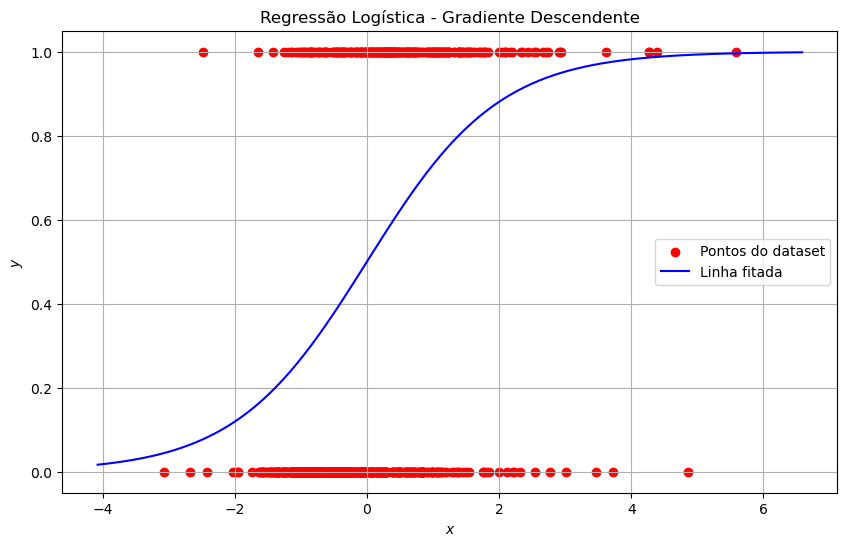

In [34]:
# Plot dos pontos e da linha fitada
plt.figure(figsize=(10, 6))
# Pontos
plt.scatter(x, y, color='red', label='Pontos do dataset')
# Linha fitada
plt.plot(x1, y1, color='blue', label=f'Linha fitada')

# Título e legendas do plot
plt.title('Regressão Logística - Gradiente Descendente')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()

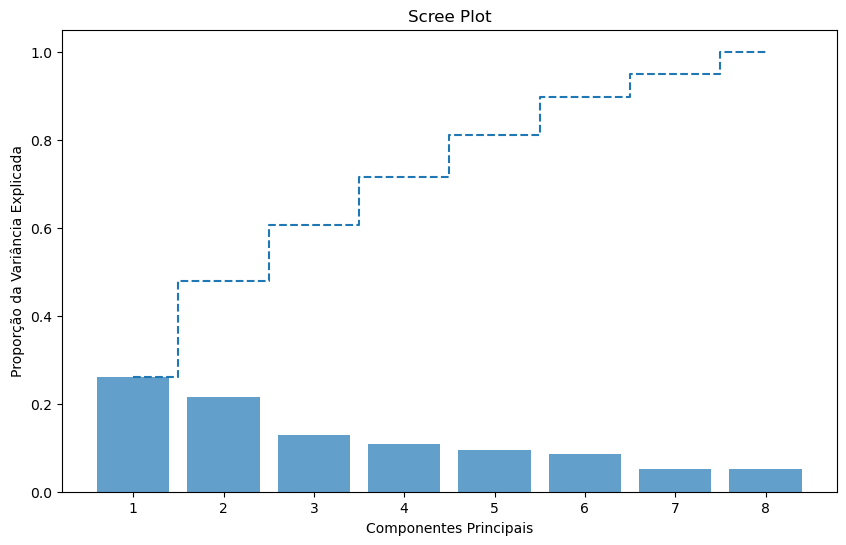

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.show()

Text(0, 0.5, 'PC8')

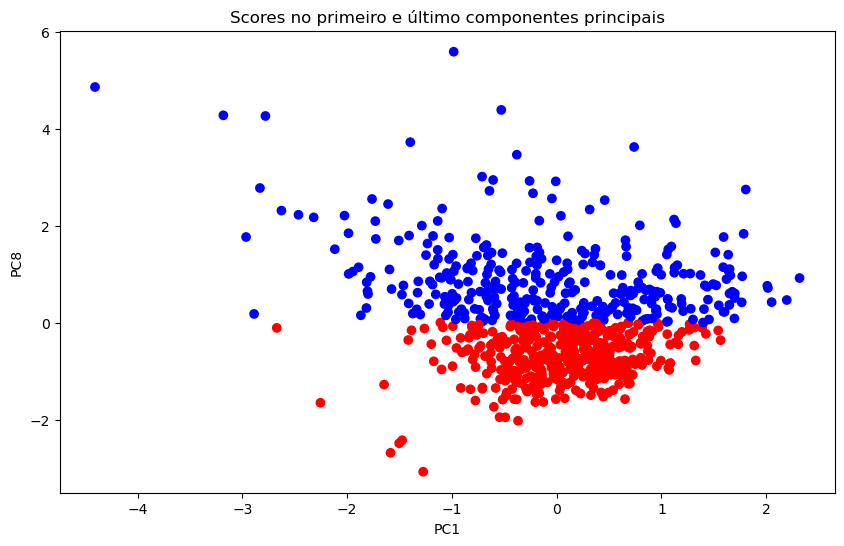

In [74]:
# Gráfico entre dois primeiros componentes principais
# PC1 e PC2 representam +- 50% da variância explicada
colors = ['red' if prediction == 0  else 'blue' for prediction in predictions]
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:,0], projected_data[:,7], c=colors)
plt.title('Scores no primeiro e último componentes principais')
plt.xlabel('PC1')
plt.ylabel('PC8')

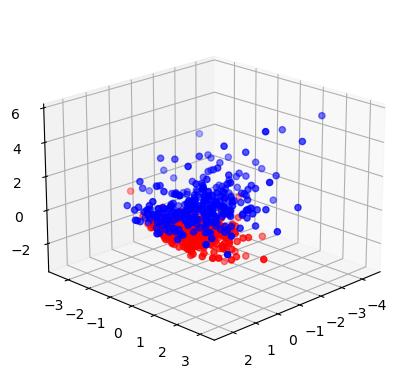

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[:,0], projected_data[:,5], projected_data[:,7], c=colors)
ax.view_init(elev=20, azim=45)
plt.show()